In [1]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
import random
from tqdm import tqdm
from collections import Counter, defaultdict
import math
from scipy.stats import kurtosis

In [2]:
def si_sim(G, sigma, beta, T=50, num_seeds=1, pbar_on=False, noise='uniform'):
    
    for n in G.nodes:
        G.nodes[n]['M'] = None
        
    for _ in range(num_seeds):
    
        node = random.randint(0, len(G.nodes) - 1)
        
        G.nodes[node]['M'] = 1
            
    dists = list() # list of list compiling all the values the people have
    counts = list() # total infected
    
    if pbar_on:
        pbar = tqdm(range(T))
    else:
        pbar = range(T)
    

    for t in pbar:

        valid_nodes = [node for node, data in G.nodes(data=True) if data['M'] is not None] # time step updates

        while len(valid_nodes) > 0:

            n = random.choice(valid_nodes)
            valid_nodes.remove(n)

            n_state = G.nodes[n]['M']


            neighbors = list(G.neighbors(n))

            for ni in neighbors:

                if not random.random() > beta:

                    ni_state = G.nodes[ni]['M']

                    if ni_state is None:
                        if noise == 'normal':
                            G.nodes[ni]['M'] = n_state + np.random.normal(0, sigma)
                        if noise == 'uniform':
                            G.nodes[ni]['M'] = n_state + np.random.uniform(-0.1, 0.1)

                    else:
                        pass

                else:
                    pass


        cts = [data['M'] for node, data in G.nodes(data=True) if data['M'] is not None]

        dists.append(cts)
        counts.append(len([i for i in cts if i is not None]))
        
        
    return dists, counts

In [3]:
N = 10000
beta = 0.1
T = 100

In [4]:
G = nx.erdos_renyi_graph(N, 4/N)

In [175]:
ER_dst, ER_count = si_sim(G=G, sigma=0.1, beta=beta, T=T, pbar_on=True)

100%|██████████| 100/100 [00:22<00:00,  4.50it/s]


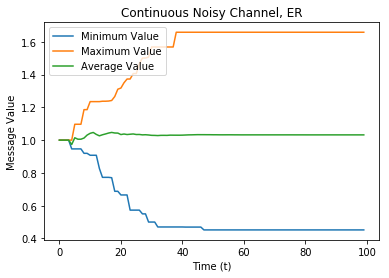

In [176]:
plt.plot(range(T), [min(t) for t in ER_dst], label='Minimum Value')
plt.plot(range(T), [max(t) for t in ER_dst], label='Maximum Value')
plt.plot(range(T), [np.mean(t) for t in ER_dst], label='Average Value')
plt.ylabel('Message Value')
plt.xlabel(r'Time (t)')
plt.legend()

plt.title('Continuous Noisy Channel, ER')

plt.savefig('continuous_noisy_er.pdf')


#plt.plot(range(50), [sum(t) for t in test1])

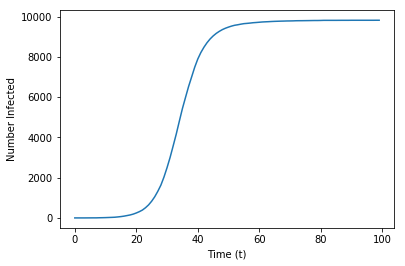

In [185]:
plt.plot(range(T), ER_count)
plt.ylabel('Number Infected')
plt.xlabel('Time (t)')
plt.savefig('continuous_SIR_ER.pdf')
#plt.plot(range(100), [ER_count[t] + (max(ER_dst[t])-1)*ER_count[t] for t in range(100)])
#plt.plot(range(100), [ER_count[t] - (1-min(ER_dst[t]))*ER_count[t] for t in range(100)])

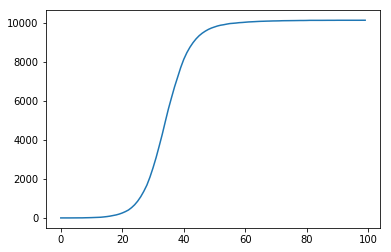

In [186]:
plt.plot(range(T), [sum(t) for t in ER_dst])

In [187]:
B = nx.barabasi_albert_graph(N, 2)

In [188]:
BA_dst, BA_count = si_sim(G=B, sigma=0.1, beta=beta, T=T, pbar_on=True)

100%|██████████| 100/100 [00:25<00:00,  4.00it/s]


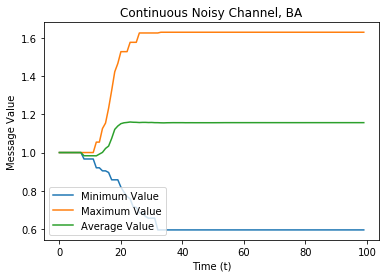

In [189]:
plt.plot(range(T), [min(t) for t in BA_dst], label='Minimum Value')
plt.plot(range(T), [max(t) for t in BA_dst], label='Maximum Value')
plt.plot(range(T), [np.mean(t) for t in BA_dst], label='Average Value')
plt.ylabel('Message Value')
plt.xlabel(r'Time (t)')
plt.legend()

plt.title('Continuous Noisy Channel, BA')

plt.savefig('continuous_noisy_ba.pdf')


#plt.plot(range(50), [sum(t) for t in test1])

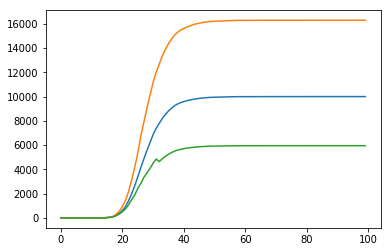

In [190]:
plt.plot(range(T), BA_count)
plt.plot(range(100), [BA_count[t] + (max(BA_dst[t])-1)*BA_count[t] for t in range(100)])
plt.plot(range(100), [BA_count[t] - (1-min(BA_dst[t]))*BA_count[t] for t in range(100)])

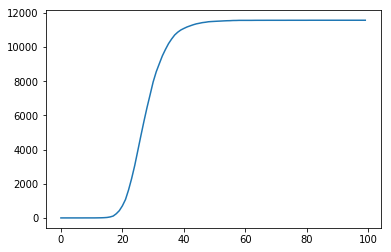

In [191]:
plt.plot(range(T), [sum(t) for t in BA_dst])

In [192]:
ER_fin_dist, ER_fin_bins = np.histogram([x for x in ER_dst[-1] if x is not None], bins=30, density=True)

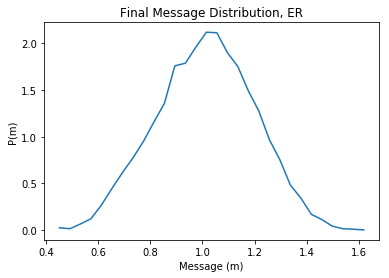

In [193]:
plt.plot(ER_fin_bins[:-1], ER_fin_dist)
plt.title('Final Message Distribution, ER')
plt.ylabel(r'P(m)')
plt.xlabel(r'Message (m)')
plt.savefig('continuous_final_dist_ER.pdf')

In [194]:
ER_probs = ER_fin_dist * np.diff(ER_fin_bins)
ER_probs = [i for i in ER_probs if i >0]
ER_H = -np.sum(ER_probs * np.log2(ER_probs))
ER_H

4.252933871107647

In [195]:
BA_fin_dist, BA_fin_bins = np.histogram([x for x in BA_dst[-1] if x is not None], bins=30, density=True)

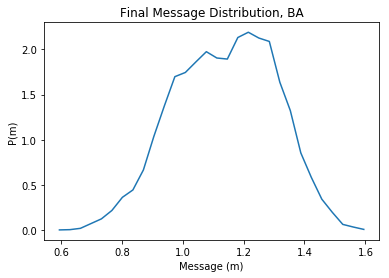

In [196]:
plt.plot(BA_fin_bins[:-1], BA_fin_dist)
plt.title('Final Message Distribution, BA')
plt.ylabel(r'P(m)')
plt.xlabel(r'Message (m)')
plt.savefig('contintuous_final_dist_BA.pdf')

In [197]:
BA_probs = BA_fin_dist * np.diff(BA_fin_bins)
BA_probs = [i for i in BA_probs if i >0]
BA_H = -np.sum(BA_probs * np.log2(BA_probs))
BA_H

4.2886292519348945

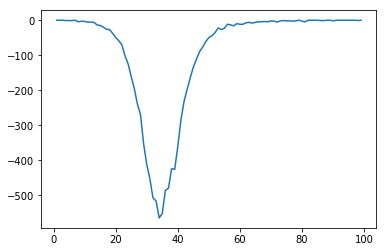

In [198]:
plt.plot(range(1,T), 0.5*np.log(2*np.pi*math.e*0.1**2)*np.diff(ER_count))

In [199]:
h_er = list()

for t in ER_dst:
    d, b = np.histogram([x for x in t], bins=30, density=True)
    p = d * np.diff(b)
    p = [i for i in p if i >0]
    h = -np.sum(p*np.log2(p))
    h_er.append(h)

In [200]:
h_ba = list()

for t in BA_dst:
    d, b = np.histogram([x for x in t], bins=30, density=True)
    p = d * np.diff(b)
    p = [i for i in p if i >0]
    h = -np.sum(p*np.log2(p))
    h_ba.append(h)

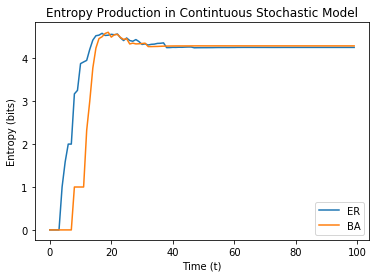

In [201]:
plt.plot(range(T), h_er, label='ER')
plt.plot(range(T), h_ba, label='BA')
plt.legend()

plt.title('Entropy Production in Continuous Stochastic Model')
plt.ylabel('Entropy (bits)')
plt.xlabel('Time (t)')

plt.savefig('continuous_entropy_production.pdf')

In [209]:
# repeated entropy

num_trials = 10
ER_entropies = list()
BA_entropies = list()

for _ in tqdm(range(num_trials)):
    
    A = nx.erdos_renyi_graph(N, 4/N)
    vals, inf = si_sim(G=A, sigma=0.1, beta=beta, T=T, pbar_on=True)
    trial_er = list()
    
    for t in vals:
        d, b = np.histogram([x for x in t], bins=30, density=True)
        p = d * np.diff(b)
        p = [i for i in p if i >0]
        h = -np.sum(p*np.log2(p))
        trial_er.append(h)
    ER_entropies.append(trial_er)
    
    B = nx.barabasi_albert_graph(N, 2)
    vals, inf = si_sim(G=B, sigma=0.1, beta=beta, T=T, pbar_on=True)
    trial_ba = list()
    
    for t in vals:
        d, b = np.histogram([x for x in t], bins=30, density=True)
        p = d * np.diff(b)
        p = [i for i in p if i >0]
        h = -np.sum(p*np.log2(p))
        trial_ba.append(h)
    BA_entropies.append(trial_ba)


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 27%|██▋       | 27/100 [00:00<00:00, 267.05it/s]

 36%|███▌      | 36/100 [00:00<00:00, 158.66it/s]

 45%|████▌     | 45/100 [00:01<00:01, 30.83it/s] 

 51%|█████     | 51/100 [00:02<00:04, 10.56it/s]

 56%|█████▌    | 56/100 [00:03<00:06,  6.39it/s]

 60%|██████    | 60/100 [00:05<00:08,  4.79it/s]

 63%|██████▎   | 63/100 [00:06<00:09,  4.01it/s]

 65%|██████▌   | 65/100 [00:07<00:09,  3.60it/s]

 67%|██████▋   | 67/100 [00:07<00:09,  3.33it/s]

 68%|██████▊   | 68/100 [00:08<00:11,  2.77it/s]

 69%|██████▉   | 69/100 [00:08<00:12,  2.49it/s]

 70%|███████   | 70/100 [00:09<00:12,  2.32it/s]

 71%|███████   | 71/100 [00:09<00:12,  2.38it/s]

 72%|███████▏  | 72/100 [00:10<00:11,  2.43it/s]

 73%|███████▎  | 73/100 [00:10<00:11,  2.44it/s]

 74%|███████▍  | 74/100 [00:10<00:10,  2.52it/s]

 75%|███████▌  | 75/100 [00:11<00:09,  2.57it/s]

 76%|███████▌  | 76/100 [00:11<00:09,  2.61it/s]

 77%|███████▋  

 93%|█████████▎| 93/100 [00:20<00:02,  2.66it/s]

 94%|█████████▍| 94/100 [00:21<00:02,  2.71it/s]

 95%|█████████▌| 95/100 [00:21<00:01,  2.74it/s]

 96%|█████████▌| 96/100 [00:22<00:01,  2.62it/s]

 97%|█████████▋| 97/100 [00:22<00:01,  2.69it/s]

 98%|█████████▊| 98/100 [00:22<00:00,  2.66it/s]

 99%|█████████▉| 99/100 [00:23<00:00,  2.70it/s]

100%|██████████| 100/100 [00:23<00:00,  4.25it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

 24%|██▍       | 24/100 [00:00<00:00, 236.03it/s]

 32%|███▏      | 32/100 [00:00<00:01, 35.82it/s] 

 38%|███▊      | 38/100 [00:02<00:05, 10.68it/s]

 42%|████▏     | 42/100 [00:03<00:09,  6.28it/s]

 45%|████▌     | 45/100 [00:04<00:12,  4.54it/s]

 48%|████▊     | 48/100 [00:05<00:14,  3.64it/s]

 50%|█████     | 50/100 [00:06<00:15,  3.19it/s]

 52%|█████▏    | 52/100 [00:07<00:17,  2.82it/s]

 53%|█████▎    | 53/100 [00:07<00:18,  2.55it/s]

 54%|█████▍    | 54/100 [00:08<00:18,  2.44it/s]

 55%|█████▌    | 55/100 [00:08<00:18,  2.39it/s]

 56%|

 91%|█████████ | 91/100 [00:27<00:04,  2.24it/s]

 92%|█████████▏| 92/100 [00:28<00:03,  2.27it/s]

 93%|█████████▎| 93/100 [00:28<00:03,  2.32it/s]

 94%|█████████▍| 94/100 [00:28<00:02,  2.36it/s]

 95%|█████████▌| 95/100 [00:29<00:02,  2.41it/s]

 96%|█████████▌| 96/100 [00:29<00:01,  2.11it/s]

 97%|█████████▋| 97/100 [00:30<00:01,  2.08it/s]

 98%|█████████▊| 98/100 [00:30<00:00,  2.04it/s]

 99%|█████████▉| 99/100 [00:31<00:00,  2.16it/s]

100%|██████████| 100/100 [00:31<00:00,  3.16it/s]

 50%|█████     | 5/10 [05:11<05:12, 62.57s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 32%|███▏      | 32/100 [00:00<00:00, 318.60it/s]

100%|██████████| 100/100 [00:00<00:00, 340.43it/s][A


  0%|          | 0/100 [00:00<?, ?it/s]

 14%|█▍        | 14/100 [00:00<00:00, 118.73it/s]

 18%|█▊        | 18/100 [00:00<00:02, 33.25it/s] 

 21%|██        | 21/100 [00:00<00:05, 13.99it/s]

 24%|██▍       | 24/100 [00:01<00:09,  7.77it/s]

 26%|██▌       | 26/100 [00:02<00:14,  4.97it/s]

 28%|██▊   

 46%|████▌     | 46/100 [00:07<00:20,  2.58it/s]

 47%|████▋     | 47/100 [00:07<00:20,  2.59it/s]

 48%|████▊     | 48/100 [00:08<00:20,  2.58it/s]

 49%|████▉     | 49/100 [00:08<00:19,  2.58it/s]

 50%|█████     | 50/100 [00:08<00:19,  2.59it/s]

 51%|█████     | 51/100 [00:09<00:18,  2.59it/s]

 52%|█████▏    | 52/100 [00:09<00:18,  2.59it/s]

 53%|█████▎    | 53/100 [00:10<00:18,  2.60it/s]

 54%|█████▍    | 54/100 [00:10<00:17,  2.58it/s]

 55%|█████▌    | 55/100 [00:10<00:18,  2.47it/s]

 56%|█████▌    | 56/100 [00:11<00:18,  2.40it/s]

 57%|█████▋    | 57/100 [00:11<00:19,  2.26it/s]

 58%|█████▊    | 58/100 [00:12<00:18,  2.26it/s]

 59%|█████▉    | 59/100 [00:12<00:18,  2.24it/s]

 60%|██████    | 60/100 [00:13<00:18,  2.19it/s]

 61%|██████    | 61/100 [00:13<00:17,  2.18it/s]

 62%|██████▏   | 62/100 [00:14<00:17,  2.16it/s]

 63%|██████▎   | 63/100 [00:14<00:16,  2.20it/s]

 64%|██████▍   | 64/100 [00:15<00:16,  2.16it/s]

 65%|██████▌   | 65/100 [00:15<00:16,  2.10it/s]



 97%|█████████▋| 97/100 [00:32<00:01,  2.26it/s]

 98%|█████████▊| 98/100 [00:32<00:00,  2.18it/s]

 99%|█████████▉| 99/100 [00:33<00:00,  2.24it/s]

100%|██████████| 100/100 [00:33<00:00,  2.96it/s]

100%|██████████| 10/10 [10:20<00:00, 62.09s/it]


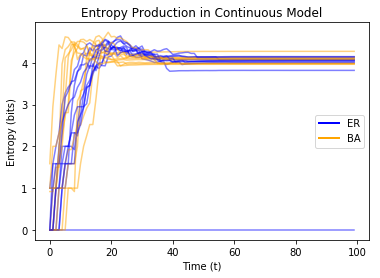

In [224]:
for trial in range(num_trials):
    plt.plot(range(T), ER_entropies[trial], color='b', alpha=0.5)
    plt.plot(range(T), BA_entropies[trial], color='orange', alpha=0.5)

legend_elements = [plt.Line2D([0], [0], color='b', lw=2, label='ER'),
                  plt.Line2D([0], [0], color='orange', lw=2, label='BA')]
plt.legend(handles=legend_elements)
plt.xlabel('Time (t)')
plt.ylabel('Entropy (bits)')

plt.title('Entropy Production in Continuous Model')
plt.savefig('continuous_multiple_entropy_generation.pdf')

In [207]:
ER_entropies[0]

-0.0

In [123]:
# Doing this repeatedly

In [124]:
num_trials = 20
ER_distributions = list()

for _ in range(num_trials):
    
    A = nx.erdos_renyi_graph(N, 4/N)
    vals, inf = si_sim(G=A, sigma=0.1, beta=beta, T=T, pbar_on=True)
    
    dist, bin_edges = np.histogram(vals[-1], bins=30, density=True)
    
    ER_distributions.append((dist, bin_edges))

100%|██████████| 100/100 [00:23<00:00,  4.32it/s]


In [125]:
num_trails = 20
BA_distributions = list()

for _ in range(num_trials):
    
    A = nx.barabasi_albert_graph(N, 2)
    vals, inf = si_sim(G=A, sigma=0.1, beta=beta, T=T, pbar_on=True)
    
    dist, bin_edges = np.histogram(vals[-1], bins=30, density=True)
    
    BA_distributions.append((dist, bin_edges))

100%|██████████| 100/100 [00:27<00:00,  3.68it/s]


In [126]:
ER_entropies = list()

for y,b in ER_distributions:
    p = y * np.diff(b)
    p = [i for i in p if i > 0]
    H = -np.sum(p * np.log2(p))
    ER_entropies.append(H)

In [127]:
BA_entropies = list()

for y,b in BA_distributions:
    p = y * np.diff(b)
    p = [i for i in p if i > 0]
    H = -np.sum(p * np.log2(p))
    BA_entropies.append(H)

In [128]:
BA_H = np.array([i for i in BA_entropies if i != np.nan])
BA_H = BA_H[~np.isnan(BA_H)]
BA_H

array([4.00466893, 4.0532708 , 4.05563695, 4.18735574, 3.84486151,
       4.01691703, 3.97960658, 4.21774559, 3.95159116, 4.10344994,
       3.80656121, 3.87046923, 4.13388022, 3.78749116, 4.18610765,
       4.02163339, 4.08364993, 4.0994787 , 3.91368076, 4.00680088])

In [129]:
ER_H = np.array([i for i in ER_entropies if i != np.nan])
ER_H = ER_H[~np.isnan(ER_H)]
ER_H

array([4.11286931, 4.13477098, 4.09925127, 4.15491298, 4.03950261,
       3.95370785, 4.25632569, 3.96843696, 4.08070201, 3.98187223,
       4.09264437, 3.87273096, 4.07344757, 4.22712861, 4.00889187,
       3.9811084 , 4.14061201, 4.0592585 , 3.98449301, 3.94762682])

In [130]:
np.mean(BA_H), np.mean(ER_H)

(4.016242867475759, 4.05851470113313)

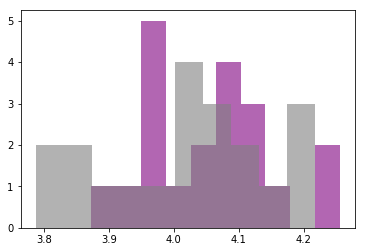

In [131]:
testhist2 = plt.hist(ER_H, color='purple', alpha=0.6)
#plt.plot(testhist2[1][:-1], testhist2[0], 'o')
testhist = plt.hist(BA_H, color='grey', alpha=0.6)
#plt.plot(testhist[1][:-1], testhist[0], 'o')

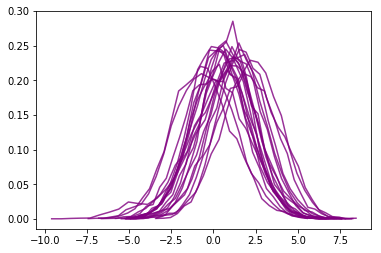

In [132]:
for h in ER_distributions:
    plt.plot(h[1][:-1], h[0], 'purple', alpha=0.8)

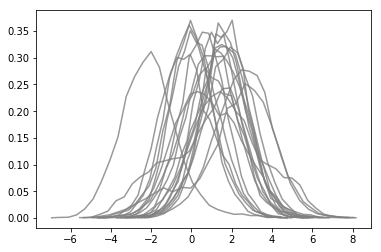

In [133]:
for h in BA_distributions:
    plt.plot(h[1][:-1], h[0], 'grey', alpha=0.8)

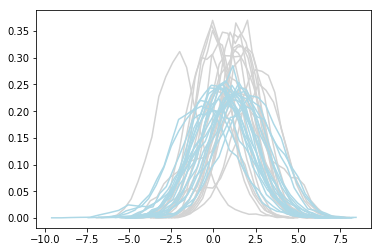

In [134]:
for h in BA_distributions:
    plt.plot(h[1][:-1], h[0], 'lightgrey')
for h in ER_distributions:
    plt.plot(h[1][:-1], h[0], 'lightblue')

In [167]:
BA_kurts = list()

for ba_dist in BA_distributions:
    BA_kurts.append(kurtosis(ba_dist[1][:-1], ba_dist[0]))
    
ER_kurts = list()

for er_dist in ER_distributions:
    ER_kurts.append(kurtosis(er_dist[1][:-1], er_dist[0]))
    


TypeError: only integer scalar arrays can be converted to a scalar index

In [166]:
BA_distributions[0]

(array([6.63489965e-04, 3.31744983e-04, 9.95234948e-04, 3.31744983e-03,
        4.97617474e-03, 9.62060450e-03, 2.48808737e-02, 3.41697332e-02,
        5.54014121e-02, 7.66330910e-02, 1.17105979e-01, 1.44640812e-01,
        2.16961219e-01, 2.58429341e-01, 3.17479948e-01, 3.48000487e-01,
        3.26768808e-01, 3.44019547e-01, 2.94257800e-01, 2.35870683e-01,
        1.77483566e-01, 1.35683698e-01, 8.02822858e-02, 4.21316128e-02,
        2.98570484e-02, 2.15634239e-02, 7.96187958e-03, 5.63966471e-03,
        1.32697993e-03, 9.95234948e-04]),
 array([-3.53142019, -3.22998383, -2.92854747, -2.62711111, -2.32567475,
        -2.02423839, -1.72280203, -1.42136567, -1.11992931, -0.81849295,
        -0.51705659, -0.21562023,  0.08581613,  0.38725249,  0.68868885,
         0.99012521,  1.29156157,  1.59299793,  1.89443429,  2.19587065,
         2.49730701,  2.79874337,  3.10017973,  3.40161609,  3.70305245,
         4.00448881,  4.30592517,  4.60736153,  4.90879789,  5.21023425,
         5.51167

In [152]:
tsth = [0, ]
for t in range(1,100):
    dh = np.log(t*2)*ER_count[t]-ER_count[t-1]
    h = tsth[t-1]+dh
    tsth.append(h)

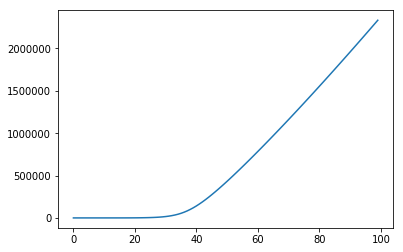

In [153]:
plt.plot(range(T), tsth)

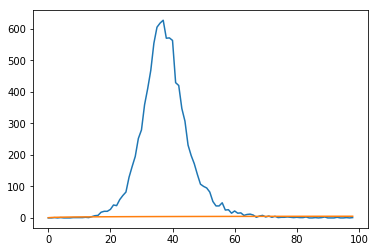

In [151]:
plt.plot(range(99), [ER_count[t]-ER_count[t-1] for t in range(1,T)])
plt.plot(range(99), [np.log(2*t) for t in range(1,T)])

# Homogenous Simulation

In [ ]:
N = 1000
e = 0.01
T = 100
beta = 0.01

In [ ]:
def si_homo_sim(N, sigma, beta, T=50, num_seeds=1, pbar_on=False, noise='uniform'):
    
    pop_dict = {n: None for n in range(N)}
    
        
    for _ in range(num_seeds):
    
        node = random.randint(0, N - 1)
        
        pop_dict[node] = 1
            
    dists = list() # list of list compiling all the values the people have
    counts = list() # total infected
    
    if pbar_on:
        pbar = tqdm(range(T))
    else:
        pbar = range(T)
    

    for t in pbar:

        valid_nodes = [node for node, data in G.nodes(data=True) if data['M'] is not None] # time step updates

        while len(valid_nodes) > 0:

            n = random.choice(valid_nodes)
            valid_nodes.remove(n)

            n_state = G.nodes[n]['M']


            neighbors = list(G.neighbors(n))

            for ni in neighbors:

                if not random.random() > beta:

                    ni_state = G.nodes[ni]['M']

                    if ni_state is None:
                        if noise == 'normal':
                            G.nodes[ni]['M'] = n_state + np.random.normal(0, sigma)
                        if noise == 'uniform':
                            G.nodes[ni]['M'] = n_state + np.random.uniform(-0.1, 0.1)

                    else:
                        pass

                else:
                    pass


        cts = [data['M'] for node, data in G.nodes(data=True) if data['M'] is not None]

        dists.append(cts)
        counts.append(len([i for i in cts if i is not None]))
        
        
    return dists, counts